In [1]:
import itertools as it
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

In [3]:
def symetryczna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations_with_replacement(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [4]:
def zewnetrzna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [5]:
#liczy zewenętrznąale numeruje poszczególne linijki outputu. Dla testów
# czy liczy odpowiednio
def zewnetrzna_num(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    for idx, wynik in enumerate(zewn, 1):
        print(f"{idx} : {wynik}")

In [6]:
D3= T_pqr(2,2,1)
D5= T_pqr(3,2,2)

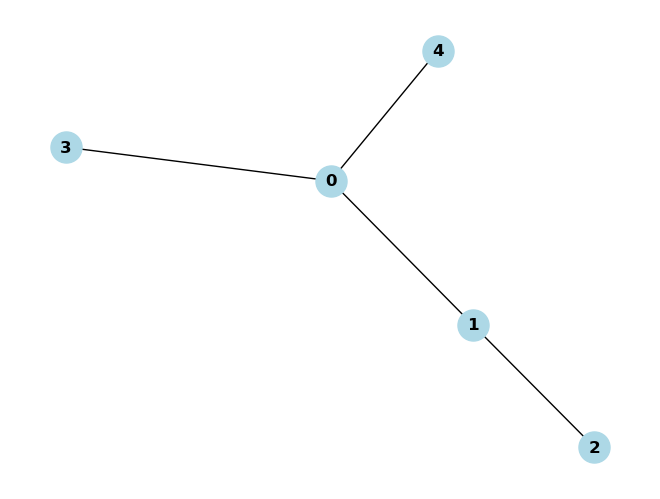

In [7]:
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

In [8]:
waga = tuple([[0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0],[0,0,-1,1,0],
            [-1,0,1,0,1],[1,0,-1,-1,0],[0,0,0,-1,0],[-1,0,0,1,0],[1,-1,0,0,-1],
           [0,-1,0,0,1],[0,1,-1,0,-1],[0,0,1,0,-1], [-1,1,-1,0,1]])

# Tak było w grafach -> zastosowanie operacji ro dla pojedynczej wagi dopóki są ujemne wierzchołki

In [9]:
def nadawanie_wag_1(G, wagi_lista):
    wagi = []
    for idx, (node, weight) in enumerate(zip(G.nodes, wagi_lista)):
        G.nodes[node]['weight'] = weight
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [10]:
def odbicie(G, node, wagi):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [11]:
def ro_1(G, wagi):    
    wagi = []
    for node in G.nodes():
        G.nodes[node]['weight'] -= 1
        wagi.append( G.nodes[node]['weight'])
    return wagi

In [12]:
def ro_2(G, wagi):    
    wagi = []
    for node in G.nodes():
        G.nodes[node]['weight'] += 1
        wagi.append( G.nodes[node]['weight'])
    return wagi

In [13]:
def zmiana_na_dodatnie_obl_ro_printujacy(G, wagi_lista):
    def pozytywne(G):
        for node, data in G.nodes(data=True):
            if data['weight'] is not None and data['weight'] < 0:
                return False
        return True

    count = 0
    nodes_z_odbiciem = []
    wagi = []
    
    nadawanie_wag(G, wagi_lista)

    while count < 10000:
        nodes_ujemne = [node for node, data in G.nodes(data=True) if isinstance(data.get('weight'), (int, float)) and data['weight'] < 0]

        for node in nodes_ujemne:
            wynik = ro_1(G, wagi_lista)
            print(f"1: {wynik}")
            wynik2 = odbicie(G, node, wynik)
            print(f"2: {wynik2}")
            wynik3 = ro_2(G, wynik2)
            print(f"3: {wynik3}")
            nodes_z_odbiciem.append(node)

        count += 1

        if pozytywne(G):
            break
            
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
        

    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu po ro_2 : {wagi}, count= {count}")

In [14]:
def zmiana_na_dodatnie_obl_ro(G, wagi_lista):
    def pozytywne(G):
        for node, data in G.nodes(data=True):
            if data['weight'] is not None and data['weight'] < 0:
                return False
        return True

    count = 0
    nodes_z_odbiciem = []
    wagi = []
    
    nadawanie_wag_1(G, wagi_lista)

    while count < 10000:
        nodes_ujemne = [node for node, data in G.nodes(data=True) if isinstance(data.get('weight'), (int, float)) and data['weight'] < 0]

        for node in nodes_ujemne:
            wynik = ro_1(G, wagi_lista)
            wynik2 = odbicie(G, node, wynik)
            wynik3 = ro_2(G, wynik2)
            nodes_z_odbiciem.append(node)

            count += 1

        if pozytywne(G):
            break
            
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
        

    return( nodes_z_odbiciem, wagi, count)

In [15]:
zmiana_na_dodatnie_obl_ro(D5, [1,-1,0,0,0])

([1, 0, 2, 1, 3, 4, 0, 1, 3, 4, 0, 2, 1], [1, 6, 0, 0, 0], 13)

# Równoleglenie

In [16]:
def nadawanie_wag(graph, n, wagi):
    for i, node in enumerate(graph.nodes()):
        graph.nodes[node]['weight'] = wagi[i]

In [17]:
def rownolegle(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    
    def pozytywne(G):
        for node, data in G.nodes(data=True):
            if data['weight'] is not None and data['weight'] < 0:
                return False
        return True

    def is_the_same(wagi1, wagi2):
        return all(all(a == b for a, b in zip(sublist1, sublist2)) for sublist1, sublist2 in zip(wagi1, wagi2))
    nadawanie_wag(graph,n, wagi_macierz)
    for i in range(n):
        for G, waga in zip(graphs, wagi_macierz[i]):
            return(zmiana_na_dodatnie_obl_ro(G, waga))

In [18]:
def rownolegle(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    
    results = []
    for G, wagi_lista in zip(graphs, wagi_macierz):
        nadawanie_wag(G, n, wagi_lista)
        
        nodes_z_odbiciem, final_weights, count = zmiana_na_dodatnie_obl_ro(G, wagi_lista)
        
        results.append((nodes_z_odbiciem, final_weights, count))
    
    for idx, (nodes, weights, count) in enumerate(results):
        print(f"Graph {idx}: Wierzchołki w kolejności wywoływania: {nodes}, wagi na końcu: {weights}, count= {count}")
    
    return results

In [19]:
rownolegle(D5, 16, waga)

Graph 0: Wierzchołki w kolejności wywoływania: [], wagi na końcu: [0, 0, 0, 0, 1], count= 0
Graph 1: Wierzchołki w kolejności wywoływania: [4, 0, 1, 3, 0, 2, 1, 4, 0, 3], wagi na końcu: [0, 1, 0, 7, 0], count= 10
Graph 2: Wierzchołki w kolejności wywoływania: [0, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0], wagi na końcu: [5, 0, 1, 0, 1], count= 15
Graph 3: Wierzchołki w kolejności wywoływania: [3, 0, 1, 4, 0, 2, 1, 3, 0, 4], wagi na końcu: [1, 0, 0, 0, 7], count= 10
Graph 4: Wierzchołki w kolejności wywoływania: [1, 0, 2, 1, 3, 4, 0, 1, 3, 4, 0, 2, 1], wagi na końcu: [0, 6, 1, 1, 0], count= 13
Graph 5: Wierzchołki w kolejności wywoływania: [1, 3, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 4], wagi na końcu: [0, 4, 1, 1, 4], count= 16
Graph 6: Wierzchołki w kolejności wywoływania: [2, 1, 0, 3, 4, 0, 1, 2], wagi na końcu: [0, 0, 8, 0, 1], count= 8
Graph 7: Wierzchołki w kolejności wywoływania: [0, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0], wagi na końcu: [5, 1, 0, 1, 0], count= 15
Graph 8: Wi

[([], [0, 0, 0, 0, 1], 0),
 ([4, 0, 1, 3, 0, 2, 1, 4, 0, 3], [0, 1, 0, 7, 0], 10),
 ([0, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0], [5, 0, 1, 0, 1], 15),
 ([3, 0, 1, 4, 0, 2, 1, 3, 0, 4], [1, 0, 0, 0, 7], 10),
 ([1, 0, 2, 1, 3, 4, 0, 1, 3, 4, 0, 2, 1], [0, 6, 1, 1, 0], 13),
 ([1, 3, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 4], [0, 4, 1, 1, 4], 16),
 ([2, 1, 0, 3, 4, 0, 1, 2], [0, 0, 8, 0, 1], 8),
 ([0, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0], [5, 1, 0, 1, 0], 15),
 ([2, 3, 0, 1, 0, 2, 4, 0, 3, 0, 1, 0, 2, 4], [1, 0, 5, 0, 5], 14),
 ([3, 0, 1, 4, 0, 2, 1, 3, 0, 4], [0, 0, 0, 0, 9], 10),
 ([0, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0], [6, 0, 0, 0, 1], 15),
 ([1, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3], [0, 5, 0, 4, 1], 16),
 ([1, 0, 2, 1, 3, 4, 0, 1, 3, 4, 0, 2, 1], [0, 7, 0, 0, 1], 13),
 ([2, 4, 0, 1, 0, 2, 3, 0, 4, 0, 1, 0, 2, 3], [0, 0, 5, 6, 1], 14),
 ([4, 0, 1, 3, 0, 2, 1, 4, 0, 3], [0, 0, 0, 8, 1], 10),
 ([0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2], [4, 1, 3, 1, 0], 1

In [22]:
odbicia_w_1_printujacy(D5, 6, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0]))

Start iteracji - wynikx: [[0, 0, 0, 0, 1], [1, 0, 0, 0, -1], [-1, 1, 0, 1, 0], [0, 1, 0, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]
Po ro_1: [[1, 1, 1, 1, 2], [2, 1, 1, 1, 0], [0, 2, 1, 2, 1], [1, 2, 1, 0, 1], [1, 0, 2, 2, 1], [2, 0, 2, 0, 1]]
Po odbicia_do_ro: [[0, -1, 0, 1, 2], [1, -1, 0, 1, 0], [-2, -2, -1, 2, 1], [-1, -2, -1, 0, 1], [1, 0, 2, 2, 1], [2, 0, 2, 0, 1]]
Po ro_2: [[-1, -2, -1, 0, 1], [0, -2, -1, 0, -1], [-3, -3, -2, 1, 0], [-2, -3, -2, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]
Dodano do waga_po_final: [[[-1, -2, -1, 0, 1], [0, -2, -1, 0, -1], [-3, -3, -2, 1, 0], [-2, -3, -2, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]]
Nowe wynikx: [[-1, -2, -1, 0, 1], [0, -2, -1, 0, -1], [-3, -3, -2, 1, 0], [-2, -3, -2, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]
Po ro_1: [[0, -1, 0, 1, 2], [1, -1, 0, 1, 0], [-2, -2, -1, 2, 1], [-1, -2, -1, 0, 1], [1, 0, 2, 2, 1], [2, 0, 2, 0, 1]]
Po odbicia_do_ro: [[1, 1, 1, 1, 2], [2, 1, 1, 1, 0], [0, 2, 1, 2, 1], [1, 2, 1, 0, 1], [1, 0, 2, 2,

In [23]:
### ten program ma taką samą logikę, ale wyrzuca tylko output
def odbicia_w_1(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    waga_dodatnia = []
    waga_po_final = []
    sprawdzone_wagi = []
    wagi_macierz = [list(wagi) for wagi in wagi_macierz]

    def contains_negative(waga_list):
        return any(any(weight < 0 for weight in podlista) for podlista in waga_list)

    def contains_positive(waga_list):
        return any(all(weight >= 0 for weight in podlista) for podlista in waga_list)

    def contains_positive_1(waga_list):
        for podlista in waga_list:
            if all(weight >= 0 for weight in podlista):
                return podlista
                
    def is_the_same(wagi1, wagi2):
        if all(all(a == b for a, b in zip(sublist1, sublist2)) for sublist1, sublist2 in zip(wagi1, wagi2)):
            return True
        
    for G, wagi in zip(graphs, wagi_macierz):
        nadawanie_wag(G, n, wagi_macierz)

    while contains_negative(wagi_macierz):
        wagi_zaktualizowane = False 

        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=True)
        node = sorted_nodes[0][0]

        for i in range(n):
            if wagi[node] != 0:
                wynik = ro_1(graph, n, wagi_macierz)
                wynik2 = odbicia_do_ro(graph, n, node, wynik)
                wynik3 = ro_2(graph, n, wynik2)

                if not is_the_same(wagi_macierz, wynik3):
                    waga_po_final.append(wynik3)
                    wagi_zaktualizowane = True 
                    
                if contains_positive_1(wynik3) and (is_the_same(wagi, wynik3) for wagi in sprawdzone_wagi) is False:
                    sprawdzone_wagi.append([row.copy() for row in wynik3])

                wagi_macierz = wynik3

        if not wagi_zaktualizowane:
            break

        if contains_positive(wagi_macierz):
            
            wagi = contains_positive_1(wagi_macierz)

            break
    print( wagi)

In [24]:
odbicia_w_1(D5, 14, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0],[0,0,-1,1,0],
            [-1,0,1,0,1],[1,0,-1,-1,0],[0,0,0,-1,0],[-1,0,0,1,0],[1,-1,0,0,-1],
           [0,-1,0,0,1],[0,1,-1,0,-1]))

[0, 0, 0, 0, 1]


In [25]:
odbicia_w_1(D5, 16, waga)

[0, 0, 0, 0, 1]


In [26]:
odbicia_w_1(D5, 5, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0]))

[0, 0, 0, 0, 1]


### wielokrotne odbijanie na wielu grafach z ro z usuwaniem trywialnych odbić oraz usuwaniem ujemnych list